<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/Covid_19_Deaths_in_G7_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
# OurWorldinData data from ECDC
full_data = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv", index_col='date')

In [0]:
full_data.index = full_data.index.astype('<M8[ns]')

In [0]:
list_G7 = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']

In [0]:
data = pd.DataFrame()
data['date'] = full_data[full_data['location'].str.contains('Italy')].reset_index()['date']
for country in list_G7:
  data[country] = full_data[full_data['location']==country]['total_deaths'].values

In [0]:
data = data.fillna(method='pad')
data = data.fillna(0)

In [0]:
data = data[data['Japan']>0]

In [0]:
data = data.set_index('date')

In [0]:
!pip install -q pandas-alive

In [25]:
import pandas_alive
print(pandas_alive.version)

0.1.9


In [0]:
animated_line_chart = data.diff().rolling(window=7).mean().fillna(0).round().plot_animated(title='Daily confirmed deaths (7-day rolling average)', kind='line',period_length=200,show_period_annotation=False,figsize=(12,8), dpi=800)

In [0]:
animated_bar_chart = data.plot_animated(title='Total confirmed deaths', kind='barh',period_length=200,figsize=(12,8),dpi=800)

/usr/local/lib/python3.6/dist-packages/pandas_alive/charts.py:743: UserWarning: Attempting to set identical left == right == 737468.0 results in singular transformations; automatically expanding.
  self.ax.set_xlim(self.df.index[: i + 1].min(), self.df.index[: i + 1].max())
/usr/local/lib/python3.6/dist-packages/pandas_alive/charts.py:752: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  .max(skipna=True),


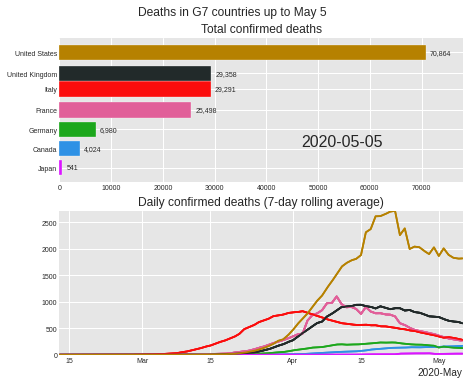

In [32]:
pandas_alive.animate_multiple_plots('example-bar-and-line-chart.mp4', plots=[animated_bar_chart,animated_line_chart], title="Deaths in G7 countries up to May 5",adjust_subplot_left=0.2)

In [0]:
from google.colab import files
files.download("example-bar-and-line-chart.mp4")